# Latent Feature Intro

## Setup

In [1]:
library(MASS)
library(tidyverse)
library(modelr)

Loading tidyverse: ggplot2
Loading tidyverse: tibble
Loading tidyverse: tidyr
Loading tidyverse: readr
Loading tidyverse: purrr
Loading tidyverse: dplyr
Conflicts with tidy packages ---------------------------------------------------
filter(): dplyr, stats
lag():    dplyr, stats
select(): dplyr, MASS


In [2]:
options(repr.matrix.max.rows=20)

## Set Up Data

In [3]:
means = c(0,0)
cov_m = frame_matrix(
    ~x, ~y,
    2, 1,
    1, 1
)
cov_m

x,y
2,1
1,1


In [4]:
data_mat = mvrnorm(10000, means, cov_m)
data = as_data_frame(data_mat)
head(data)

V1,V2
1.3095845,0.8839753
-1.1871097,-1.0103531
0.5215354,-0.2188523
-2.0931882,-0.6088025
1.7764230,1.4118045
1.9924464,1.8288273


In [5]:
dim(data)

[1] 10000     2

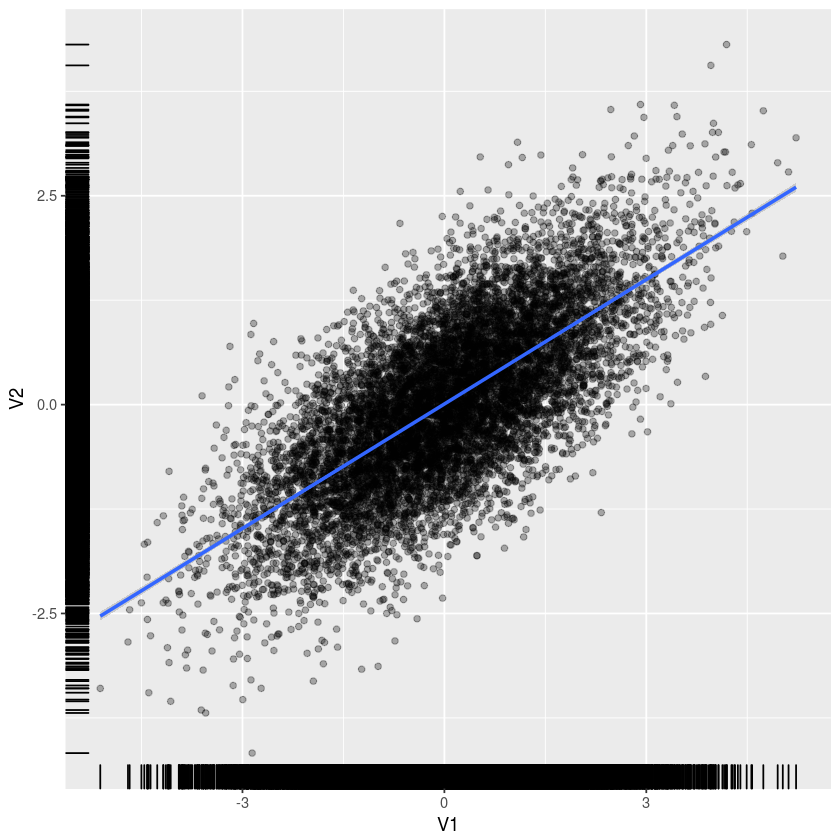

In [6]:
ggplot(data) +
    aes(x=V1, y=V2) +
    geom_point(alpha=0.3) +
    geom_rug() +
    geom_smooth(method="lm")

In [7]:
line = lm(V2 ~ V1, data)
summary(line)


Call:
lm(formula = V2 ~ V1, data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.76055 -0.48339  0.00234  0.47952  2.69170 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 0.007524   0.007080   1.063    0.288    
V1          0.496657   0.004988  99.563   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.7079 on 9998 degrees of freedom
Multiple R-squared:  0.4979,	Adjusted R-squared:  0.4978 
F-statistic:  9913 on 1 and 9998 DF,  p-value: < 2.2e-16


In [8]:
preds = data %>%
    add_predictions(line) %>%
    add_residuals(line)
head(preds)

V1,V2,pred,resid
1.3095845,0.8839753,0.6579385,0.2260368
-1.1871097,-1.0103531,-0.5820628,-0.4282902
0.5215354,-0.2188523,0.2665482,-0.4854005
-2.0931882,-0.6088025,-1.0320733,0.4232708
1.7764230,1.4118045,0.8897973,0.5220072
1.9924464,1.8288273,0.9970869,0.8317404


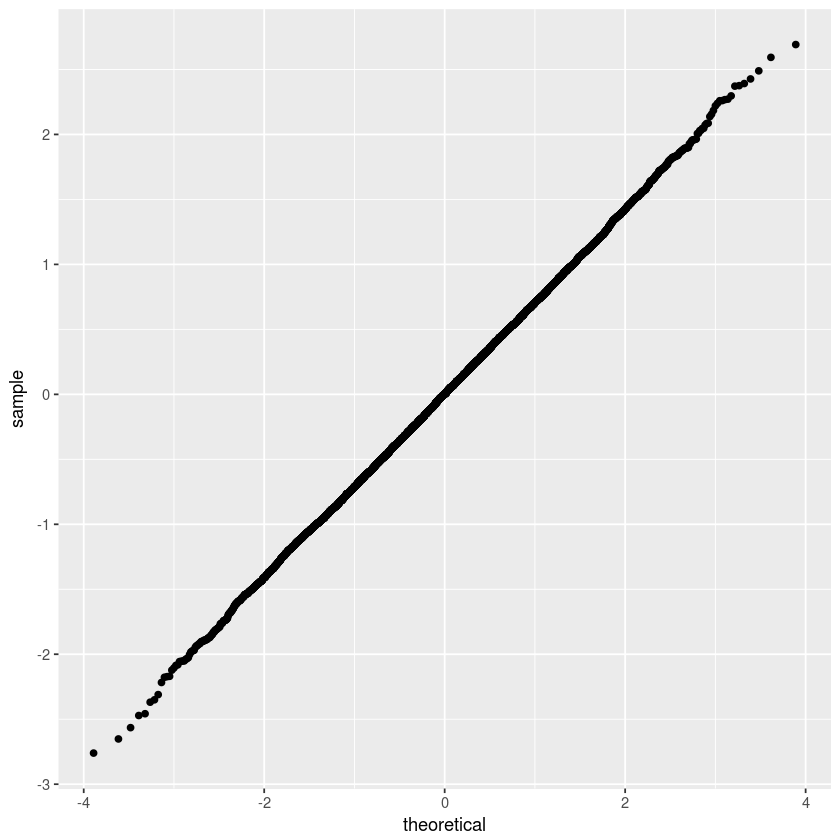

In [9]:
ggplot(preds) +
    aes(sample=resid) +
    geom_qq()

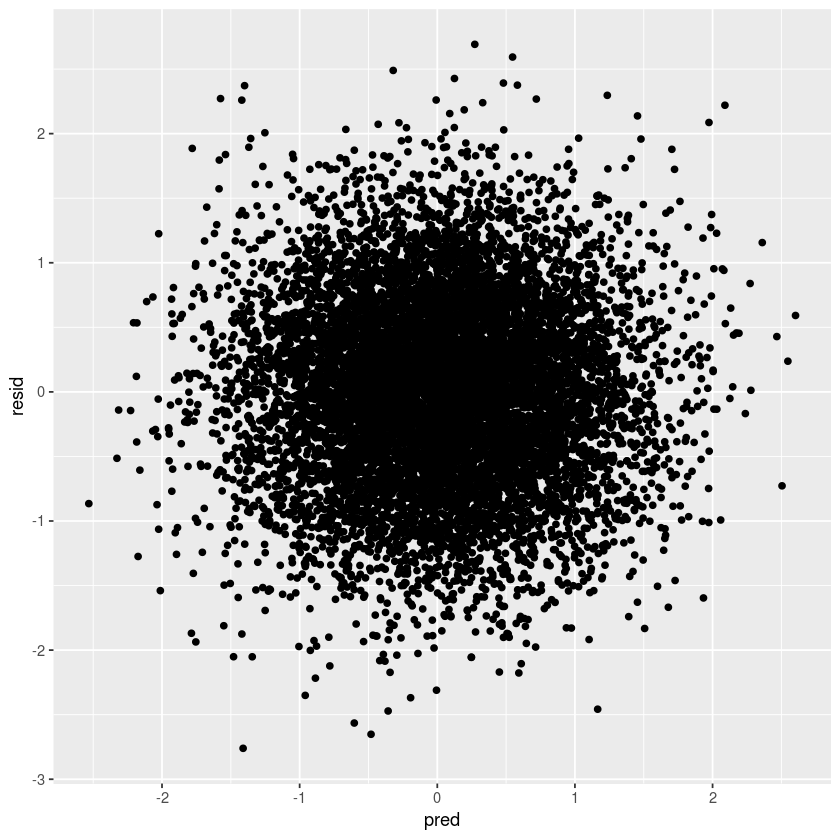

In [10]:
ggplot(preds) +
    aes(x=pred, y=resid) +
    geom_point()

## SVD

In [11]:
decomp = svd(data_mat)

In [12]:
decomp$d

[1] 162.12476  61.96926

In [13]:
decomp$v

-0.8522831,-0.5230809
-0.5230809,0.8522831


The columns of $V$ give the direction of our primary and secondary lines, as vectors; we divide to convert to slopes.

In [14]:
slopes = decomp$v[2,] / decomp$v[1,]
slopes

[1]  0.6137408 -1.6293525

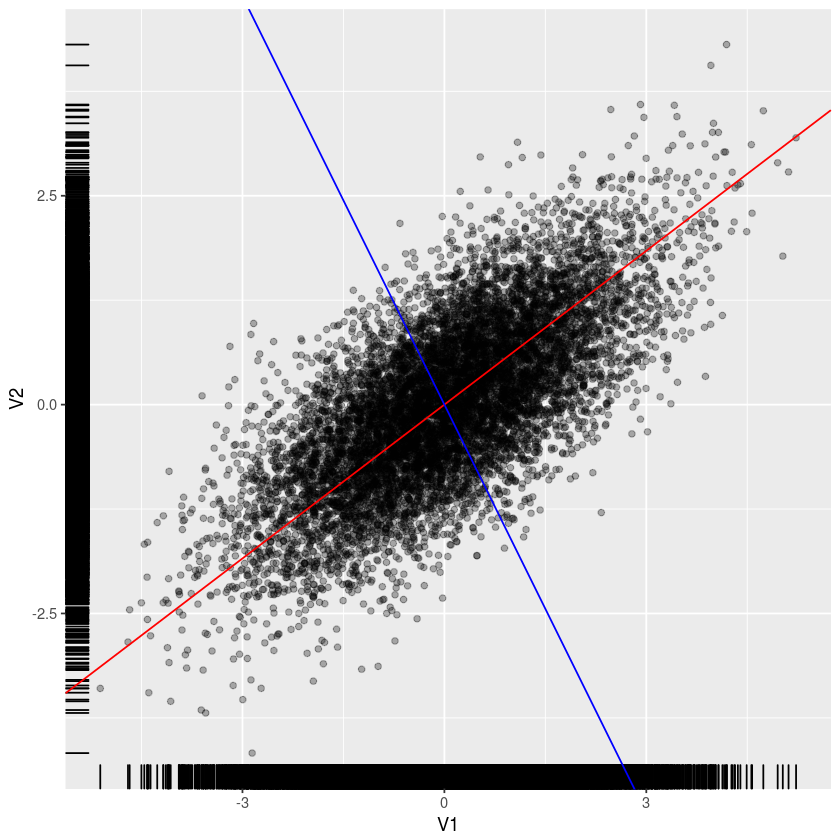

In [15]:
ggplot(data) +
    aes(x=V1, y=V2) +
    geom_point(alpha=0.3) +
    geom_rug() +
    geom_abline(slope=slopes[1], color='red') +
    geom_abline(slope=slopes[2], color="blue")

Et voilá! We have our main axes for this data.